In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style="whitegrid")

# Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [2]:
import pandas as pd
# reading the datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Inspect the data
customers_head = customers_df.head()
products_head = products_df.head()
transactions_head = transactions_df.head()

# Display basic information about each dataset
customers_info = customers_df.info()
products_info = products_df.info()
transactions_info = transactions_df.info()
(customers_head, products_head, transactions_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

In [3]:
# Convert date columns to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Check for duplicates in all datasets
customers_duplicates = customers_df.duplicated().sum()
products_duplicates = products_df.duplicated().sum()
transactions_duplicates = transactions_df.duplicated().sum()

# Check for any missing values again after conversion
customers_missing = customers_df.isnull().sum()
products_missing = products_df.isnull().sum()
transactions_missing = transactions_df.isnull().sum()

# Output results
{
    "customers_duplicates": customers_duplicates,
    "products_duplicates": products_duplicates,
    "transactions_duplicates": transactions_duplicates,
    "customers_missing": customers_missing,
    "products_missing": products_missing,
    "transactions_missing": transactions_missing,
}

{'customers_duplicates': 0,
 'products_duplicates': 0,
 'transactions_duplicates': 0,
 'customers_missing': CustomerID      0
 CustomerName    0
 Region          0
 SignupDate      0
 dtype: int64,
 'products_missing': ProductID      0
 ProductName    0
 Category       0
 Price          0
 dtype: int64,
 'transactions_missing': TransactionID      0
 CustomerID         0
 ProductID          0
 TransactionDate    0
 Quantity           0
 TotalValue         0
 Price              0
 dtype: int64}

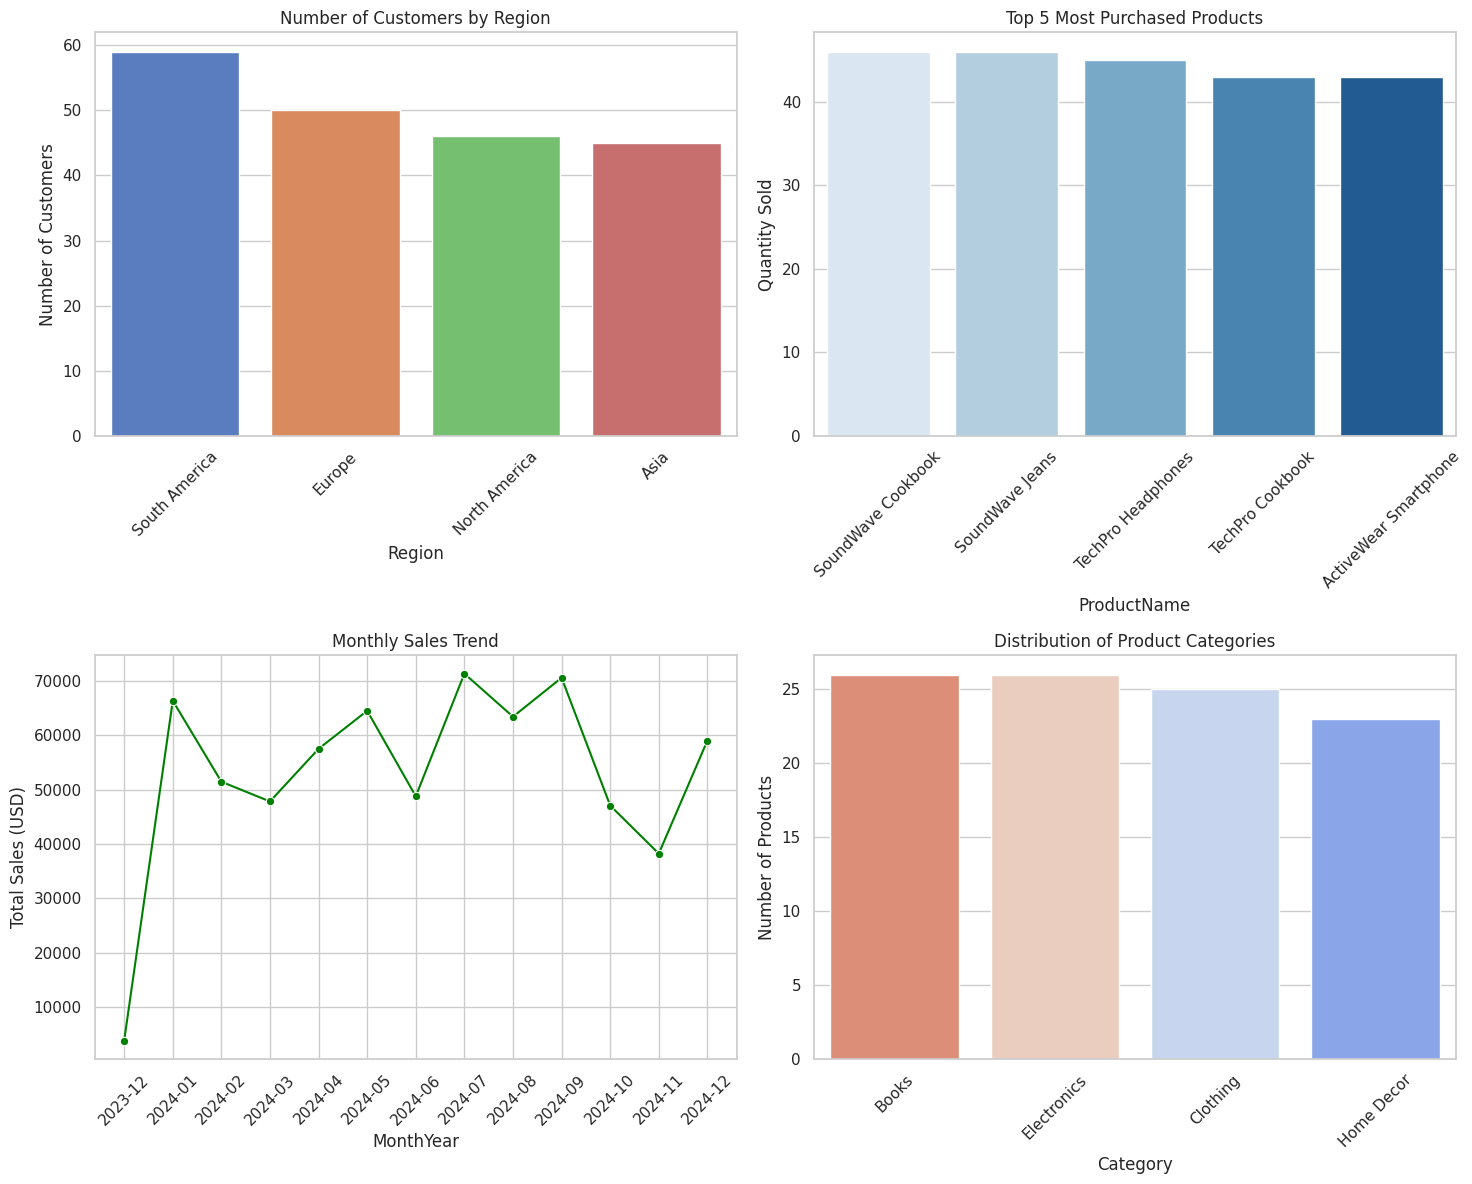

In [9]:
# Plotting the results
plt.figure(figsize=(15, 12))

# Customers by region
plt.subplot(2, 2, 1)
sns.barplot(x=customers_by_region.index, y=customers_by_region.values, hue=customers_by_region.index, dodge=False, palette="muted")  # Explicit hue
plt.title("Number of Customers by Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)

# Top 5 products by quantity
plt.subplot(2, 2, 2)
sns.barplot(x=top_products['ProductName'], y=top_products['Quantity'], hue=top_products['ProductName'], dodge=False, palette="Blues")  # Explicit hue
plt.title("Top 5 Most Purchased Products")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)

# Monthly sales trend
plt.subplot(2, 2, 3)
sns.lineplot(x=monthly_sales['MonthYear'].astype(str), y=monthly_sales['TotalValue'], marker="o", color="green")
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)

# Distribution of product categories
plt.subplot(2, 2, 4)
sns.barplot(x=category_distribution.index, y=category_distribution.values, hue=category_distribution.index, dodge=False, palette="coolwarm_r")  # Explicit hue
plt.title("Distribution of Product Categories")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
